# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [31]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [33]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

import graphviz

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

#### монотонные функции от одного признака:

множество вариантов разбиения не меняется, поэтому нет смысла их использовать.

#### немонотонные функции от одного признака:

так как дерево пытается подобрать пороговое значение, чтобы лучше разбить выборку, а немонотонные функции только мешают этому, то их использование приведёт к ухудшению точности, если конечно немонотонность не является частью закономерности таргета от признака.

#### линейные и нелинейные функции от нескольких признаков:

ответ на следущие два вопроса практически аналогичен ответу на предыдущие два: если мы действительно ожидаем линейную (нелинейную) зависимость между признаками и целевой переменной, то такое преобразование имеет место, но если иначе $-$ мы рискуем получить переобученную модель и плохую интерпретируемость результатов.

#### стандартизация признаков:

её применять нет смысла, поскольку разбиение элементов в узле осуществляется по пороговым значениям, а так как при стандартизации порядок элементов сохраняется, то и отличий при прочих равных не будет.

#### преобразования категориальных признаков:

если категориальные признаки имеют логичный порядок, например, степень заболевания или класс пассажира, тогда можно обойтись и без преобразования, но зачастую это не так, и мы можем использовать OneHot Encoding, чтобы операции решающего дерева были лучше интерпретируемы для нас. 

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Оставим те же признаки, что и в предыдущем задании, так как остальные колонки не несут весомой информации, а последние два столбца casual и registered в сумме дают целевую переменную, что бессмысленно было бы использовать.

In [49]:
df = pd.read_csv('day.csv')

columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
features, target = columns[:-1], columns[-1]
df = df[columns]
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [50]:
train, valid_test = train_test_split(df, test_size=0.4, shuffle=True)
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True)

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

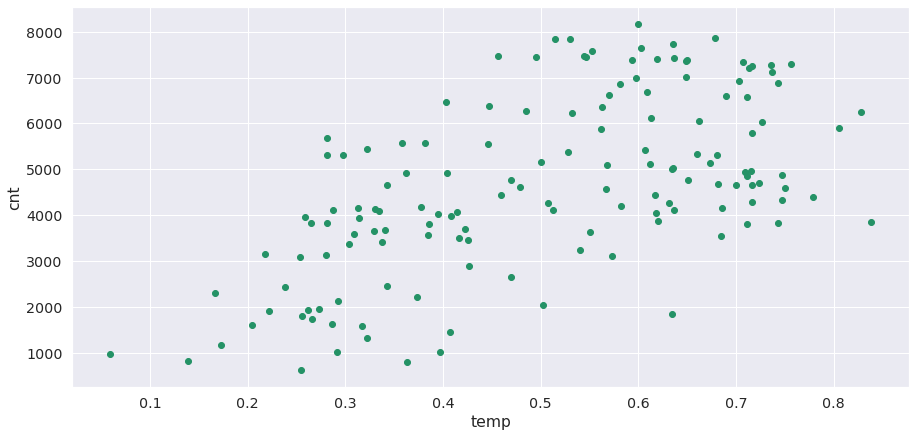

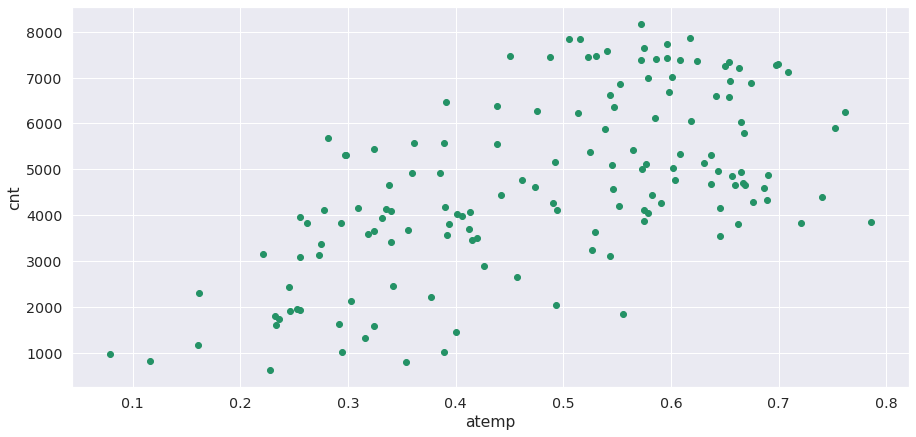

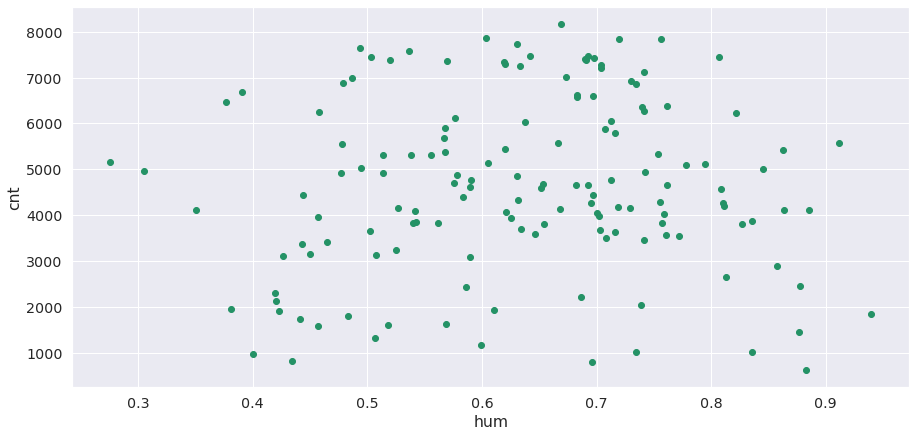

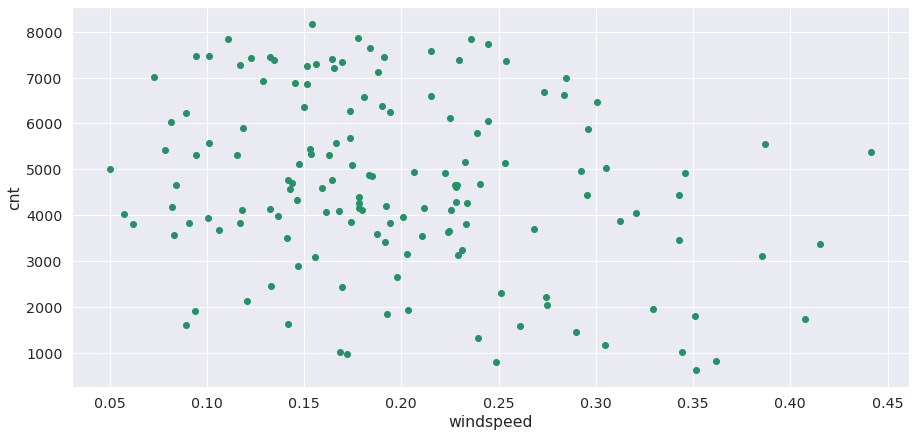

In [51]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']

sns.set(font_scale=1.3, palette='summer')

for real in real_features:
    plt.figure(figsize=(15, 7))
    plt.scatter(x=test[real], y=test[target], alpha=1)
    plt.xlabel('{}'.format(real))
    plt.ylabel('cnt')
    plt.show()

In [52]:
train = train[train['hum'] >= 0.2]
train = train[train['cnt'] >= 100]
train = train[train['windspeed'] <= 0.43]
train = train[train['atemp'] <= 0.8]
train = train[train['temp'] >= 0.1]

valid = valid[valid['hum'] >= 0.35]
valid = valid[valid['windspeed'] <= 0.35]
valid = valid[valid['atemp'] <= 0.75]
valid = valid[valid['temp'] <= 0.8]

test = test[test['windspeed'] <= 0.37]
test = test[test['temp'] <= 0.8]
test = test[test['atemp'] >= 0.25]
test = test[test['hum'] >= 0.35]

In [53]:
train_cat = pd.DataFrame()

for cat in categorial_features:
    train_cat = pd.concat([train_cat, pd.get_dummies(train[cat], prefix=cat)], axis=1)
    
x_train = pd.concat([train[real_features], train_cat], axis=1)
y_train = train[target]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [54]:
def get_graphviz_graph(decision_tree_regressor, X, y):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X, y)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X.columns, class_names=target,  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

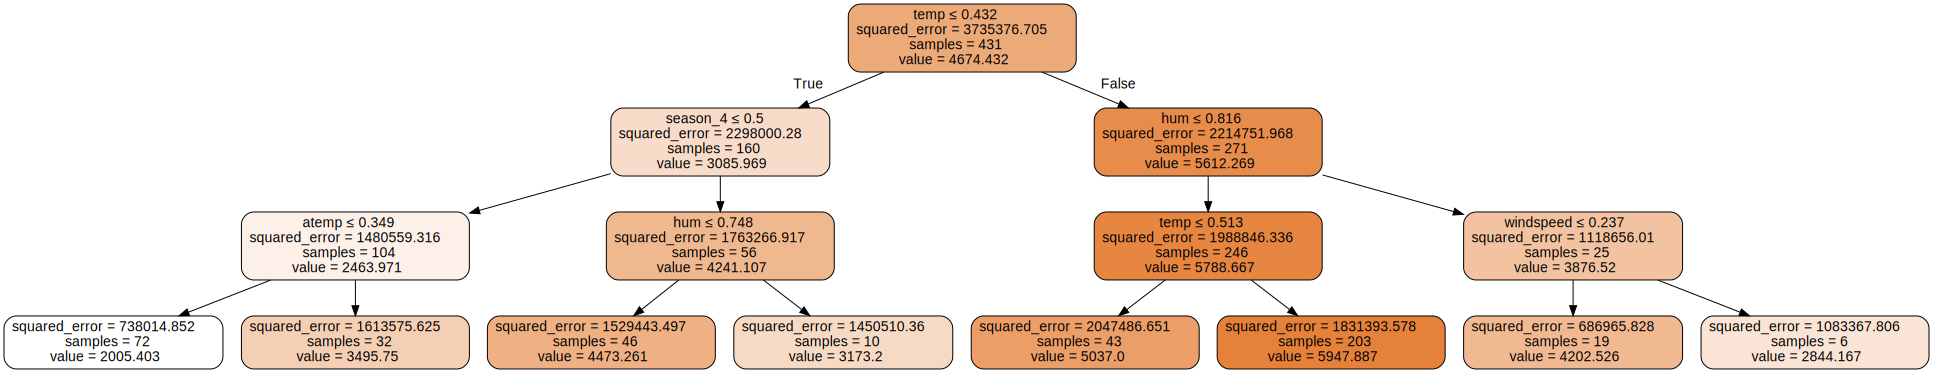

In [55]:
bicycle_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
graph = get_graphviz_graph(bicycle_regressor, x_train, y_train)
graph

In [56]:
graph.render('depth3')

'depth3.pdf'

In [57]:
valid_cat = pd.DataFrame()

for cat in categorial_features:
    valid_cat = pd.concat([valid_cat, pd.get_dummies(valid[cat], prefix=cat)], axis=1)
    
x_valid = pd.concat([valid[real_features], valid_cat], axis=1)
y_valid = valid[target]

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [58]:
depth = np.arange(1, 21)
loss_depth = []

for dep in depth:
    reg = DecisionTreeRegressor(random_state=42, max_depth=dep)
    reg.fit(x_train, y_train)
    
    pred = reg.predict(x_valid)
    loss_depth.append(metrics.mean_squared_error(pred, y_valid)**0.5)

Text(0.5, 1.0, 'Зависимость ошибки от глубины дерева')

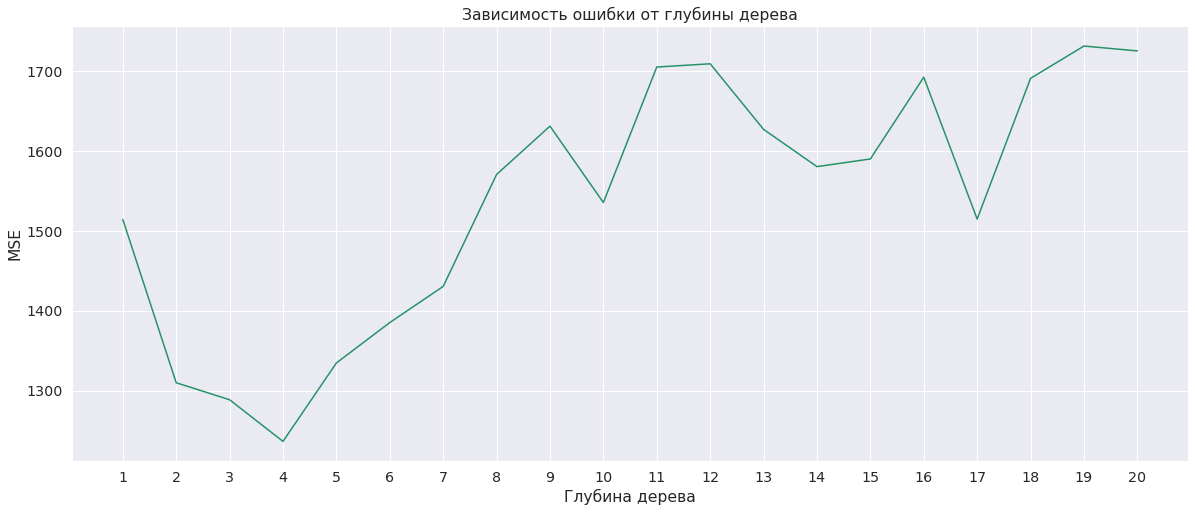

In [59]:
plt.figure(figsize=(20, 8))
plt.plot(depth, loss_depth)
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.xticks(range(1, 21))
plt.title('Зависимость ошибки от глубины дерева')

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [60]:
dep_opt = 1+np.argmin(loss_depth)

num_samples =  np.arange(1, 100)
loss_samples = []

for num in num_samples:
    reg = DecisionTreeRegressor(random_state=42, max_depth=dep_opt, min_samples_leaf=num)
    reg.fit(x_train, y_train)
    
    pred = reg.predict(x_valid)
    loss_samples.append(metrics.mean_squared_error(pred, y_valid)**0.5)
    
samples_opt = 1+np.argmin(loss_samples)

Text(0.5, 1.0, 'Зависимость ошибки от минимального количества элементов в листе')

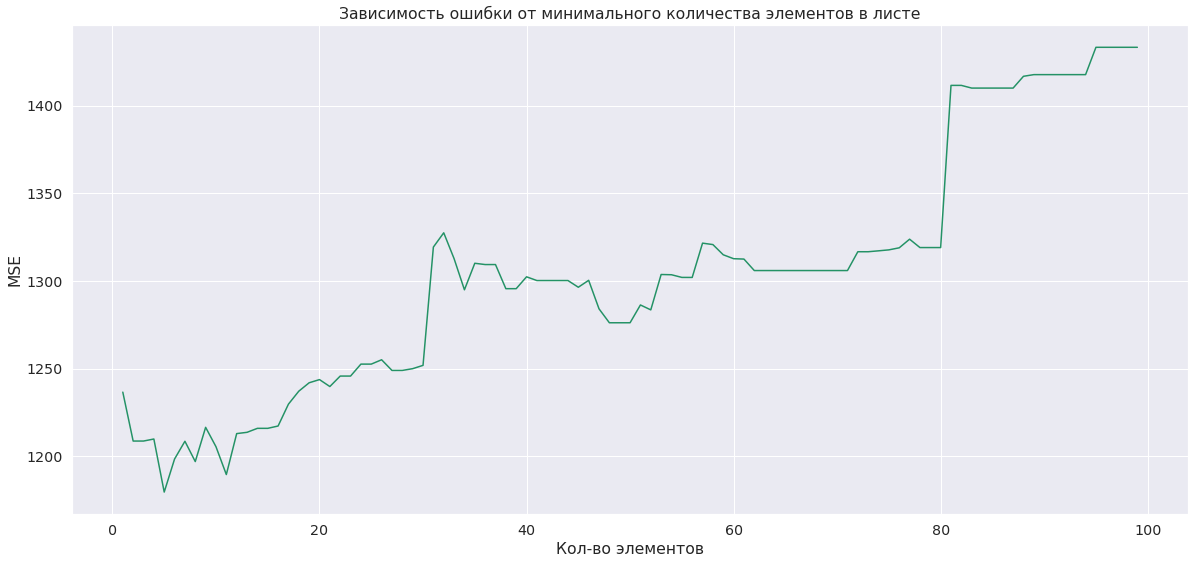

In [61]:
plt.figure(figsize=(20, 9))
plt.plot(num_samples, loss_samples)
plt.xlabel('Кол-во элементов')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от минимального количества элементов в листе')

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

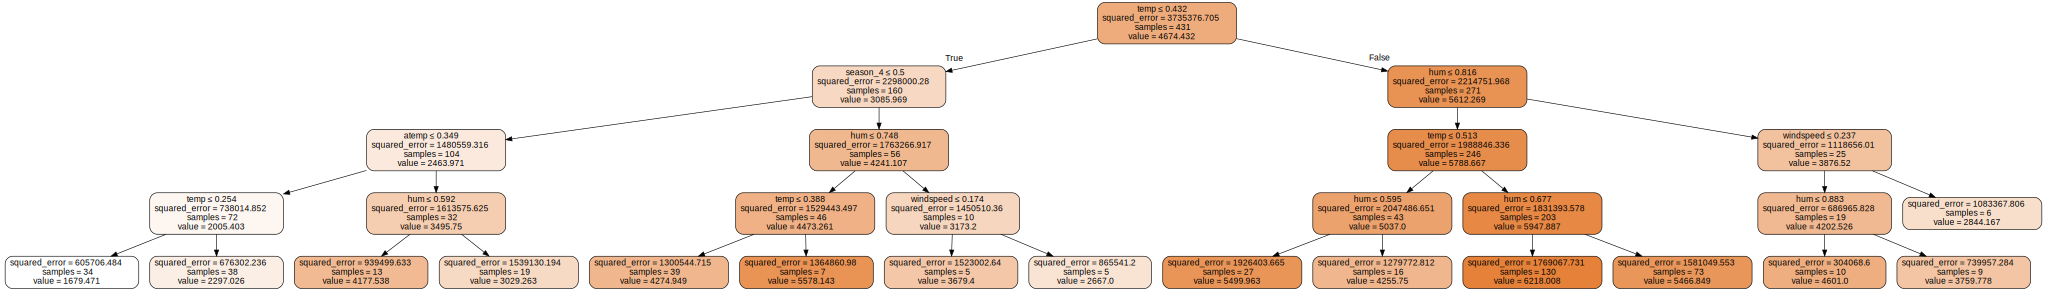

In [62]:
bicycle_regressor = DecisionTreeRegressor(random_state=42, max_depth=dep_opt, min_samples_leaf=samples_opt)
graph = get_graphviz_graph(bicycle_regressor, x_train, y_train)
graph

In [63]:
graph.render('optimal')

'optimal.pdf'

In [64]:
test_cat = pd.DataFrame()

for cat in categorial_features:
    test_cat = pd.concat([test_cat, pd.get_dummies(test[cat], prefix=cat)], axis=1)
    
x_test = pd.concat([test[real_features], test_cat], axis=1)
y_test = test[target]

In [65]:
samples_opt = 1+np.argmin(loss_samples)

reg = DecisionTreeRegressor(random_state=42, max_depth=dep_opt, min_samples_leaf=samples_opt)
reg.fit(x_train, y_train)

pred = reg.predict(x_test)

print("MSE = ", metrics.mean_squared_error(pred, y_test)**0.5)
print("MAE = ", metrics.mean_absolute_error(y_test, pred))
print("MAPE = ", 100*metrics.mean_absolute_percentage_error(y_test, pred))

MSE =  1362.143614680878
MAE =  1190.2732807781736
MAPE =  30.473596897664613


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

Text(0.5, 1.0, 'Важность каждого признака')

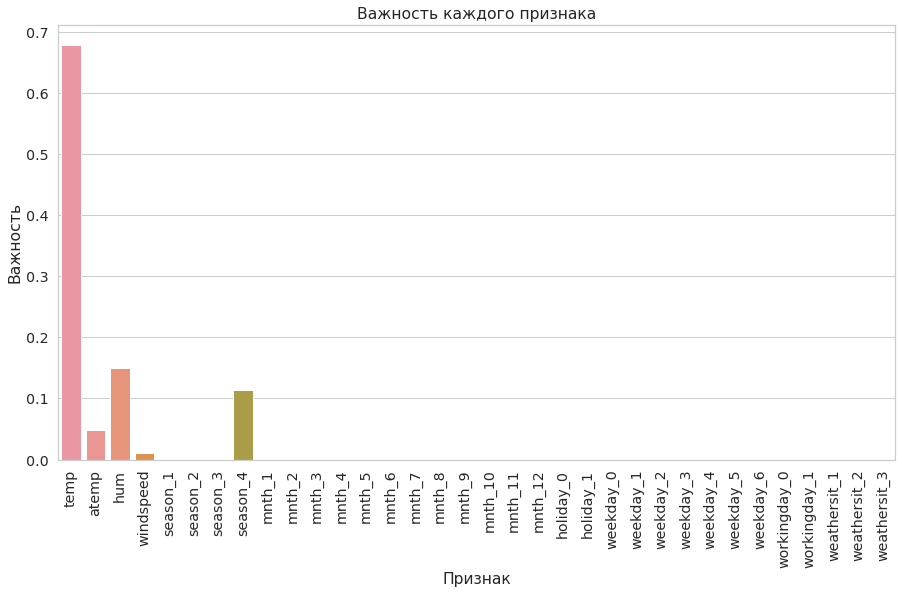

In [66]:
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
plt.figure(figsize=(15, 8))
sns.barplot(x=x_train.columns, y=reg.feature_importances_)
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.title('Важность каждого признака')

Сделайте выводы.

На нескольких итерациях самые важные признаки для решающего дерева $-$ temp или atemp, оно и понятно, ведь они часто совпадают и неочевидно, какой конкретно брать. Это говорит нам, что в первую очередь люди руководствовались прогнозами перед арендой велосипеда.

Так же мы подобрали оптимальные гиперпараметры для модели, чтобы степень переобучения была минимальна. Результаты не очень впечатляют, но всё ещё довольно хорошо интерпреируемы. 

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [67]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, max_depth=dep_opt, min_samples_leaf=samples_opt)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, n_estimators=500,
                      random_state=42)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [68]:
estimators_list = np.copy(model.estimators_)

num_trees = np.arange(1, 500)
final_loss = []

for n_estimators in num_trees:
    _loss = 0
    models = np.random.choice(estimators_list, n_estimators, replace=False)
    
    for m in models: 
        pred = m.predict(x_valid)
        _loss += metrics.mean_squared_error(pred, y_valid)**0.5

    final_loss.append(_loss/n_estimators)

Text(0.5, 1.0, 'Зависимость ошибки от размера леса')

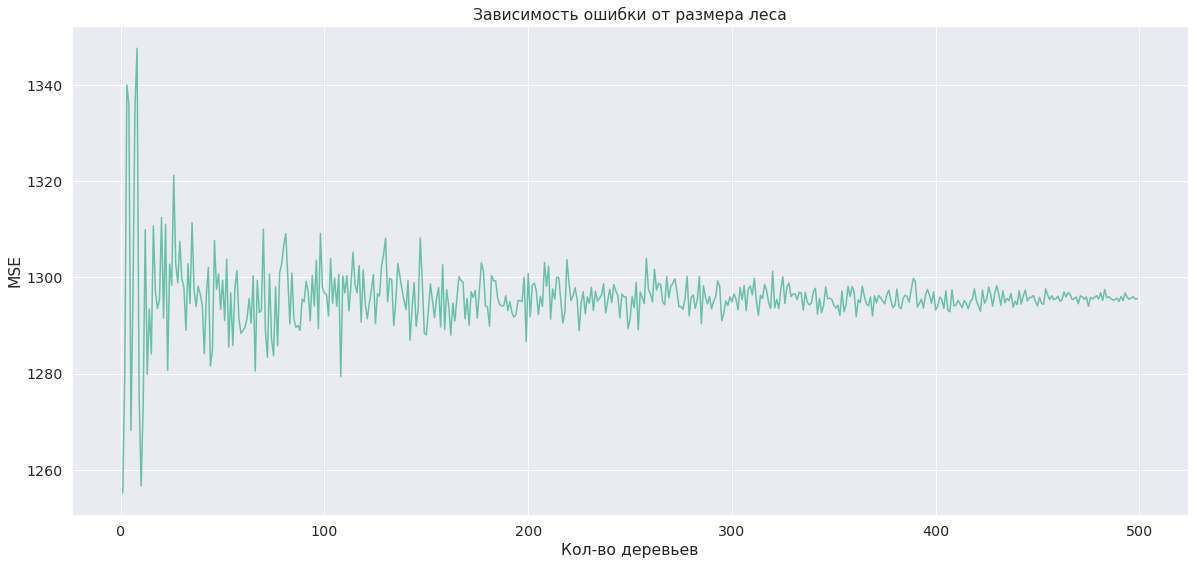

In [71]:
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
plt.figure(figsize=(20, 9))
plt.plot(num_trees, final_loss)
plt.xlabel('Кол-во деревьев')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от размера леса')

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

Text(0.5, 1.0, 'Важность каждого признака')

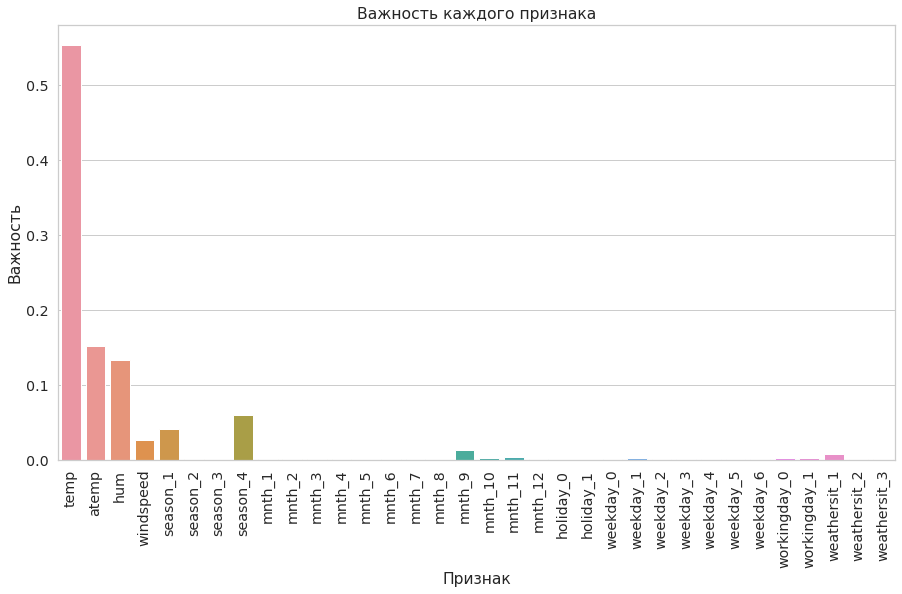

In [72]:
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
plt.figure(figsize=(15, 8))
sns.barplot(x=x_train.columns, y=model.feature_importances_)
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.title('Важность каждого признака')

Сделайте выводы.

При усреднении все признаки имеют ненулевую важность, но в целом график примерно такой же как и для отдельного дерева. Также подтвердилось то, что temp и atemp являются зависимыми, потому что одна половина деревьев из леса выбирала первый из них, а другая $-$ второй, что говорит об их сильной схожести.

По графику ошибки можно наблюдать ЗБЧ, так как после леса размером ~50 деревьев ошибка практически перестаёт меняться значительно.

Можно отметить, что деревья сильно чаще опирались на осень и сентябрь в частности. Возможно, в это время имело место какая-то промо-акция для пользователей.